# MNIST Loader

### This notebook will identify how to load the MNIST data set properly and run an extremely simple version of a neural network that classifies numbers.

In [47]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential

We will now load the MNIST data set.

In [48]:
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

Let's see the shape and what the first picture looks like.

In [49]:
X_train.shape

(60000, 28, 28)

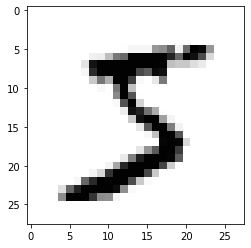

In [50]:
plt.imshow(X_train[0], cmap='Greys')

In [5]:
y_train[0]

5

As you can see the first picture looks like a 5 and in the data set it is identified as a 5.

Next we are going to divde the value associated with each pixel by 255 since that is the total number of pixels. We will do this so each value is between 0 and 1. 0 represents a white pixel and 1 represents a black pixel. Anything in between is how we will end up identifying our numbers.

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train = X_train.reshape(60000, 28*28)

Awesome! Now we have loaded the MNIST data from TensorFlow. Also we have seen what the first value of the training set is. Keep in mind there is also a test set of about 10,000 values to use later on as validation for our model.

# Simple Neural Network

This is a few examples of very simple neural networks that actually perform quite well.

The first model is made with 10 hidden layers. 10 because of the digits 0-9. Also 'softmax' is simple what outputs probabilities. This will make the behind the scenes stuff easier to understand and help the model learn.

In [51]:
model = Sequential([Dense(10, activation='softmax')])

Next, let's look at what tensorflow is actually doing with our images.

In [52]:
sample_img = X_train[0]

sample_img.shape

(28, 28)

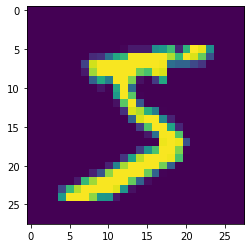

In [53]:
plt.imshow(sample_img)

In [54]:
sample_img = sample_img.reshape(1, 28*28)

This gets the first image and then reshapes it to be a 2D Tensor or a vector. This vector contains one 784 long list basically as can be seen below.

In [55]:
sample_img.shape

(1, 784)

Next, we see the output which is probabilities that this really is a 5.

In [56]:
model(sample_img)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[1.6042215e-01, 2.1027127e-35, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 3.2043387e-25, 8.3957779e-01, 1.7335174e-10,
        1.1104219e-19, 0.0000000e+00]], dtype=float32)>

The next line shows us all the weights within each hidden unit. They start as random while the biases start at zero.

In [57]:
model.layers[0].weights

[<tf.Variable 'dense_15/kernel:0' shape=(784, 10) dtype=float32, numpy=
 array([[-0.05846742,  0.05089685,  0.03040907, ..., -0.01231546,
          0.05304966,  0.01115066],
        [ 0.0194096 , -0.07144418,  0.02413383, ..., -0.03689209,
          0.07128891, -0.08571263],
        [-0.08008501, -0.064864  ,  0.04885086, ..., -0.05985323,
          0.03977708, -0.06900616],
        ...,
        [-0.00663378,  0.06777798, -0.03110932, ..., -0.04666734,
         -0.05839569,  0.04122718],
        [-0.06541267,  0.00522578,  0.0450846 , ...,  0.0634033 ,
         -0.04345373, -0.00045403],
        [-0.05678395,  0.05164827, -0.08535505, ..., -0.00329105,
         -0.06994352,  0.0574287 ]], dtype=float32)>,
 <tf.Variable 'dense_15/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>]

Next we must compile our model. We will need a loss function and an optimizer. There are many different types but these are what were selected. The optimizer and loss function help teach our model new paramters (weights and biases) so that it can perform better

In [9]:
# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

Now we are ready to train our model.

In [10]:
model.fit(X_train, y_train)

1875/1875 [==============================] - 2s 935us/step - loss: 0.4658 - accuracy: 0.8776


As you can see this simple model with no epochs tested at 88% accuracy which isn't too bad. Next we are going to add some epochs. This basically does this same process over and over to increase the computers accuracy. Be careful though as too many epochs can lead to overtraining where the model memorizes the images.

In [11]:
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 832us/step - loss: 0.3034 - accuracy: 0.9152
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2829 - accuracy: 0.9206
Epoch 3/10
1875/1875 [==============================] - 2s 909us/step - loss: 0.2727 - accuracy: 0.9242
Epoch 4/10
1875/1875 [==============================] - 2s 969us/step - loss: 0.2665 - accuracy: 0.9256
Epoch 5/10
1875/1875 [==============================] - 2s 867us/step - loss: 0.2616 - accuracy: 0.9272
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2583 - accuracy: 0.9283: 0s - loss: 0.2578 - accuracy: 0.
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2555 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2529 - accuracy: 0.9303
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2509 - accuracy: 0.9304: 0s - loss:
Epoch 10/10
1875/1875 [=====

Wow! That model now predicted images at 93% which is a large improvment. Lastly, we will add a validation training set so that we can make sure the model isn't overtraining and is instead actually learning.

In [12]:
model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2487 - accuracy: 0.9312 - val_loss: 0.2462 - val_accuracy: 0.9344
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2459 - accuracy: 0.9313 - val_loss: 0.2497 - val_accuracy: 0.9329
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2440 - accuracy: 0.9320 - val_loss: 0.2544 - val_accuracy: 0.9301
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2421 - accuracy: 0.9317 - val_loss: 0.2545 - val_accuracy: 0.9307
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2408 - accuracy: 0.9323 - val_loss: 0.2576 - val_accuracy: 0.9296
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2394 - accuracy: 0.9330 - val_loss: 0.2558 - val_accuracy: 0.9308
Epoch 7/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2384 - accuracy: 0.9328 - val_loss: 0.2610 - val_accuracy:

Still performing well. Next we are going to add a few layers to our neural network.

In [13]:
model = Sequential([Dense(100), 
                    Dense(10, activation='softmax')])

In [14]:
# Define a loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compile the model
model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.3801 - accuracy: 0.8924 - val_loss: 0.3098 - val_accuracy: 0.9118
Epoch 2/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3026 - accuracy: 0.9151 - val_loss: 0.3023 - val_accuracy: 0.9188
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2885 - accuracy: 0.9180 - val_loss: 0.3112 - val_accuracy: 0.9123
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2815 - accuracy: 0.9211 - val_loss: 0.3120 - val_accuracy: 0.9151
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2748 - accuracy: 0.9232 - val_loss: 0.2966 - val_accuracy: 0.9203
Epoch 6/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2705 - accuracy: 0.9235 - val_loss: 0.3018 - val_accuracy: 0.9176
Epoch 7/10
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2672 - accuracy: 0.9247 - val_loss: 0.2933 - val_accuracy:

As you can see this didn't actually help the training much but with the right mix of layers you can help your model learn a lot. One more neural network just for practice.

In [16]:
deep_model = Sequential([Dense(10),
                         Dense(40),
                         Dense(60),
                         Dense(40),
                   Dense(10, activation='softmax')])

In [17]:
deep_model.compile(optimizer='adam', loss=loss_fn, metrics=['accuracy'])

In [18]:
deep_model.fit(X_train, y_train, epochs=10, validation_split=0.3)

Epoch 1/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4546 - accuracy: 0.8639 - val_loss: 0.3320 - val_accuracy: 0.9047
Epoch 2/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3247 - accuracy: 0.9076 - val_loss: 0.3314 - val_accuracy: 0.9062
Epoch 3/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3046 - accuracy: 0.9127 - val_loss: 0.3121 - val_accuracy: 0.9127
Epoch 4/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2968 - accuracy: 0.9154 - val_loss: 0.3117 - val_accuracy: 0.9131
Epoch 5/10
1313/1313 [==============================] - 2s 2ms/step - loss: 0.2895 - accuracy: 0.9179 - val_loss: 0.2982 - val_accuracy: 0.9174
Epoch 6/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2854 - accuracy: 0.9174 - val_loss: 0.3097 - val_accuracy: 0.9152
Epoch 7/10
1313/1313 [==============================] - 2s 1ms/step - loss: 0.2803 - accuracy: 0.9205 - val_loss: 0.3153 - val_accuracy: